In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("8-fraud_detection.csv")

In [3]:
df.head()

transaction_amount  transaction_risk_score  is_fraud
0            1.879910               -1.485035         0
1            0.377083               -2.238585         0
2            1.354312               -2.664638         0
3           -0.509843               -1.502950         0
4            0.863561               -1.906364         0

In [4]:
df["is_fraud"].unique()

array([0, 1])

In [5]:
df["is_fraud"].value_counts()

is_fraud
0    9846
1     154
Name: count, dtype: int64

In [6]:
# imbalanced dataset

In [7]:
X = df.drop("is_fraud", axis = 1)
y = df["is_fraud"]

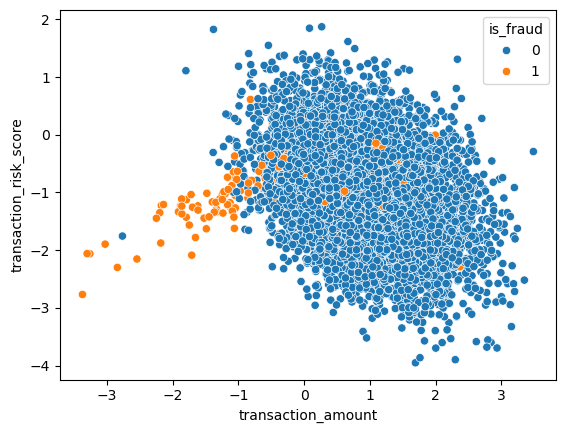

In [10]:
sns.scatterplot(x = X["transaction_amount"], y = X["transaction_risk_score"], hue=y)
plt.show()

In [11]:
from sklearn.model_selection import train_test_split

In [13]:
X_train,X_test,y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state =15)

In [16]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [21]:
penalty = ["l1","12","elasticnet"]
c_values = [100,10,1,0.1,0.01]
solver = ["lbfgs", "liblinear","newton-cg","newton-cholesky","sag","saga"]
# imbalanced datasetlerinde class_weight parametresini kullanıyoruz. belirli bir sınıfa daha fazla ağrılık veririz
class_weight = [{0:w,1:y} for w in [1,10,50,100] for y in [1,10,50,100]]

In [22]:
class_weight

[{0: 1, 1: 1},
 {0: 1, 1: 10},
 {0: 1, 1: 50},
 {0: 1, 1: 100},
 {0: 10, 1: 1},
 {0: 10, 1: 10},
 {0: 10, 1: 50},
 {0: 10, 1: 100},
 {0: 50, 1: 1},
 {0: 50, 1: 10},
 {0: 50, 1: 50},
 {0: 50, 1: 100},
 {0: 100, 1: 1},
 {0: 100, 1: 10},
 {0: 100, 1: 50},
 {0: 100, 1: 100}]

In [23]:
params = dict(penalty = penalty, C= c_values, solver=solver,class_weight = class_weight)

In [24]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [25]:
cv = StratifiedKFold()

In [27]:
grid = GridSearchCV(estimator = model, param_grid = params, scoring = "accuracy",cv = cv)

In [29]:
import warnings
warnings.filterwarnings("ignore")

In [31]:
grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(),
             param_grid={'C': [100, 10, 1, 0.1, 0.01],
                         'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 10},
                                          {0: 1, 1: 50}, {0: 1, 1: 100},
                                          {0: 10, 1: 1}, {0: 10, 1: 10},
                                          {0: 10, 1: 50}, {0: 10, 1: 100},
                                          {0: 50, 1: 1}, {0: 50, 1: 10},
                                          {0: 50, 1: 50}, {0: 50, 1: 100},
                                          {0: 100, 1: 1}, {0: 100, 1: 10},
                                          {0: 100, 1: 50}, {0: 100, 1: 100}],
                         'penalty': ['l1', '12', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             scoring='accuracy')

In [33]:
y_pred = grid.predict(X_test)

In [34]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [35]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [36]:
score = accuracy_score(y_pred, y_test)
print("score: ", score)
print(classification_report(y_pred, y_test))
print("confusion_matrix: \n ", confusion_matrix(y_pred, y_test))

score:  0.9915
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1984
           1       0.48      0.81      0.60        16

    accuracy                           0.99      2000
   macro avg       0.74      0.90      0.80      2000
weighted avg       0.99      0.99      0.99      2000

confusion_matrix: 
  [[1970   14]
 [   3   13]]


In [37]:
grid.best_params_


{'C': 100,
 'class_weight': {0: 10, 1: 50},
 'penalty': 'l1',
 'solver': 'liblinear'}

In [38]:
# roc, auc

The ROC Curve is a graphical representation of a classification model’s performance across different threshold values. It plots the True Positive Rate (Recall) on the Y-axis against the False Positive Rate (1 - Specificity) on the X-axis. • A model that perfectly distinguishes between classes has a curve that reaches the top-left corner. • The closer the curve is to the top-left, the better the model. • The area under the ROC curve (AUC) quantifies this performance: • AUC = 1 → perfect classifier • AUC = 0.5 → random guessing

ROC is especially useful for imbalanced datasets, as it evaluates the model independent of class distribution or threshold.